In [2]:
import loader
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import tqdm
import matplotlib.pyplot as plt
sns.set()

In [3]:
cond = glob.glob('../../../logs/bm-alife-tp-allconf-method2-noclamp-2019-03-07-1737/fake/see/**/rep00')
cond = glob.glob('../../../logs/bm-tp-cluster-p99999--2019-03-09-02*/c8/**/rep00')

megaresults = {}
megalogs = {}
megaconds = {'control': '../../../logs/bm-alife-tp-allconf-method2-noclamp-2019-03-13-0534/fake_see/**/rep00',
             '0': '../../../logs/bm-tp-cluster-24cpu-edition-smartindex-allruns-2019-03-12-1634/c8p0/**/rep00',
             '0.99': '../../../logs/bm-tp-cluster-24cpu-edition-smartindex-allruns-2019-03-12-1634/c8p0.99/**/rep00',
             '1': '../../../logs/bm-tp-cluster-24cpu-edition-smartindex-allruns-2019-03-12-1634/c8p1/**/rep00'}
for name, condpath in megaconds.items():
    cond = glob.glob(condpath)
    results = []
    logs = []
    i=1
    maxrun = 33
    for log in tqdm.tqdm_notebook(loader.getlogs(cond), total=min(len(cond),maxrun)):
        if i > maxrun: break
        out = pd.merge(log.query('oppId != -1 and playing == 1')[['id', 'oppId', 'iter', 'eval']],
                         log.query('oppId != -1 and playing == 1')[['id', 'oppId', 'iter', 'eval']],
                         on=['oppId', 'iter', 'eval'])
        out['run'] = i
        log['run'] = i
        results.append(out)
        logs.append(log)
        i += 1
    megaresults[name] = pd.concat(results)
    megalogs[name] = pd.concat(logs)

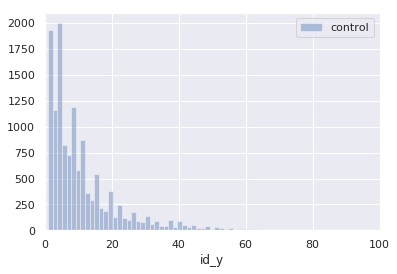

11.075405856470946


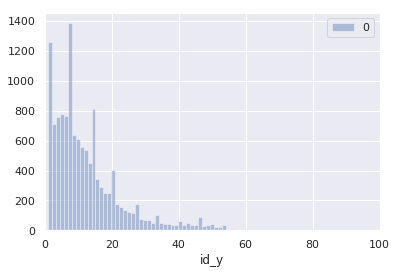

12.549596805762155


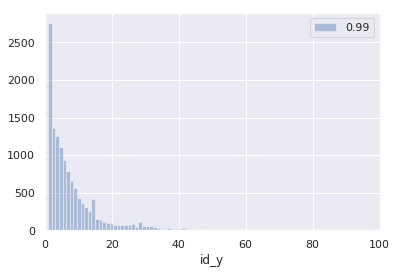

7.945480181732727


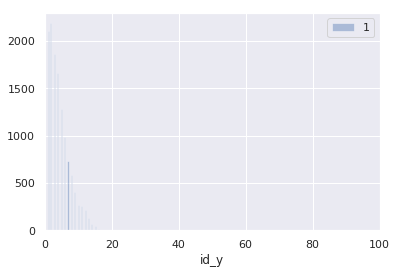

4.3773260359655985


In [4]:
for name, result in megaresults.items():
    plt.figure()
    sns.distplot(result.query('id_x != id_y').groupby(['id_x', 'eval', 'run'])['id_y'].nunique(), kde=False, label=name)
    plt.xlim(0, 100)
    plt.legend()
    plt.show()
    print(np.mean(result.query('id_x != id_y').groupby(['id_x', 'eval', 'run'])['id_y'].nunique()))

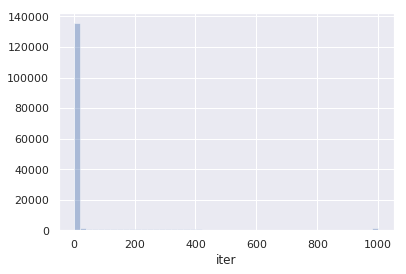

In [5]:
sns.distplot(result.query('id_x != id_y').groupby(['id_x', 'id_y', 'oppId', 'eval', 'run'])['iter'].count(), kde=False)

In [6]:
sorted(log.query('id == 1 and eval == 0 and oppId != -1')['oppId'].unique())

[60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0]

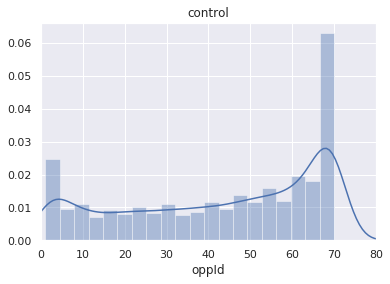

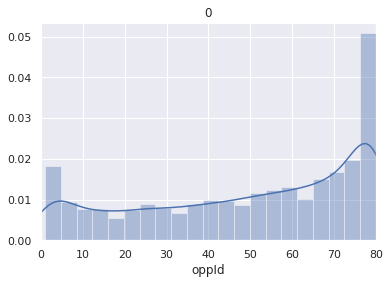

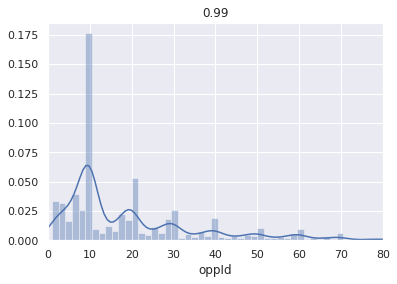

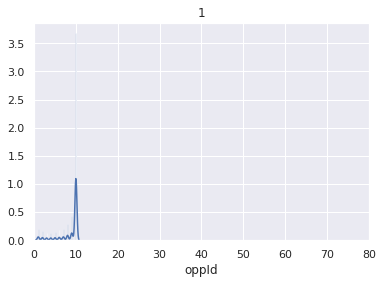

In [7]:
for name, log in megalogs.items():
    log = log.query('oppId != -1')
    plt.figure()
    sns.distplot(log.groupby(['run', 'id', 'eval'])['oppId'].nunique())
    plt.xlim(0, 80)
    plt.title(name)


In [170]:
log.query('id == 1')

,eval,iter,id,a,fakeCoef,playing,oppId,nbOnOpp,curCoop,meanOwn,meanTotal,punish,spite,run
1,0,0,1,5,1.07141,0.0,31.0,1.0,7.28187,7.28187,0.00000,0.0,0.0,1
101,0,1,1,5,1.07141,1.0,32.0,2.0,7.28187,7.28187,7.65643,0.0,0.0,1
201,0,2,1,5,1.07141,1.0,32.0,2.0,7.28187,7.28187,7.65643,0.0,0.0,1
301,0,3,1,5,1.07141,1.0,32.0,2.0,7.28187,7.28187,7.65643,0.0,0.0,1
401,0,4,1,5,1.07141,1.0,32.0,2.0,7.28187,7.28187,7.65643,0.0,0.0,1
501,0,5,1,5,1.07141,1.0,32.0,2.0,7.28187,7.28187,7.65643,0.0,0.0,1
601,0,6,1,5,1.07141,1.0,32.0,2.0,7.28187,7.28187,7.65643,0.0,0.0,1
701,0,7,1,5,1.07141,1.0,32.0,2.0,7.28187,7.28187,7.65643,0.0,0.0,1
801,0,8,1,5,1.07141,1.0,32.0,2.0,7.28187,7.28187,7.65643,0.0,0.0,1
901,0,9,1,5,1.07141,1.0,32.0,2.0,7.28187,7.28187,7.65643,0.0,0.0,1
